<a href="https://colab.research.google.com/github/ralik45/E-Commerce-Analysis/blob/main/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
____
- Nama: Barra Malik Wibowo
- Email: malikbarra@gmail.com
- ID Dicoding: barra_malik

## Pertanyaan Bisnis
____

1. Berapa Total sales, orders, dan customers per bulan selama ini?
2. Berapa Total sales per customer per bulan selama ini?
3. Apakah ada korelasi antara waktu delivery dan kepuasan pelanggan
4. Seberapa royal pelanggan dari recency, frequency, dan monetary pada bulan ini?
5. Bagaimana harga rata-rata produk per kategori, dan kategori mana yang paling diminati oleh pelanggan?


## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
____

### Gathering Data

#### Customers

In [2]:
customers_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Geolocation

In [3]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Order Items

In [4]:
order_items_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Order Payments

In [5]:
order_payments_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Order Reviews

In [6]:
order_reviews_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Orders

In [7]:
orders_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Product Category

In [8]:
product_category_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Products

In [9]:
products_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Sellers

In [10]:
sellers_df = pd.read_csv("/content/drive/MyDrive/Projects/E-Commerce Analysis/Data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assesing Data

#### Customers
aman

In [11]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [14]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


*   tidak ada missing value
*   tidak ada data yang terduplikat





#### Geolocations
*   Terdapat 261831 data yang duplikat

In [16]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Order Items
- Tidak duplikat data
- kesalahan tipe data apada kolom shipping limit date (object -> datetime)
- ada yang janggal dengan freight value
- Jumlah freight_value yang sama dengan 0.00: 383



In [19]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [22]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [23]:
freight_zero_df = order_items_df[order_items_df["freight_value"] == 0.00]
freight_zero_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
...,...,...,...,...,...,...,...
111094,fc698f330ec7fb74859071cc6cb29772,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-25 02:31:57,53.9,0.0
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.0
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.0
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.0


In [24]:
freight_zero_count = order_items_df[order_items_df["freight_value"] == 0.00].shape[0]
print(f"Jumlah freight_value yang sama dengan 0.00: {freight_zero_count}")

Jumlah freight_value yang sama dengan 0.00: 383


#### Order Payments

In [25]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [28]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [29]:
payment_zero_df = order_payments_df[(order_payments_df["payment_installments"] == 0) |
                                    (order_payments_df["payment_value"] == 0.00)]
payment_zero_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00


In [30]:
payment_zero_count = order_payments_df[(order_payments_df["payment_installments"] == 0) |
                                    (order_payments_df["payment_value"] == 0.00)].shape[0]
print(f"Jumlah payment_installments dan payment_value yang sama dengan 0.00: {payment_zero_count}")

Jumlah payment_installments dan payment_value yang sama dengan 0.00: 11


In [31]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
# Gabungkan kedua tabel menggunakan 'order_id' sebagai key
merged_df = pd.merge(order_payments_df, orders_df, on='order_id', how='left')

selected_columns_df = merged_df[['order_status', 'payment_type', 'payment_installments', 'payment_value']]

display(selected_columns_df[(order_payments_df["payment_installments"] == 0) |
                                    (order_payments_df["payment_value"] == 0.00)])

,order_status,payment_type,payment_installments,payment_value
19922,delivered,voucher,1,0.00
36822,shipped,voucher,1,0.00
43744,delivered,voucher,1,0.00
46982,delivered,credit_card,0,58.69
51280,canceled,not_defined,1,0.00
57411,canceled,not_defined,1,0.00
62674,delivered,voucher,1,0.00
77885,shipped,voucher,1,0.00
79014,delivered,credit_card,0,129.94
94427,canceled,not_defined,1,0.00


#### Order Reviews
**Note**
- review_comment_title	87656 null
- review_comment_message	58247 null
- review_creation_date salah tipe data (object -> datetime)
- review_answer_timestamp salah tipe data (object -> datetime)

In [33]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [34]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [35]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [36]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [37]:
# Hitung jumlah dan persentase
review_score_counts = order_reviews_df["review_score"].value_counts()
review_score_percentage = order_reviews_df["review_score"].value_counts(normalize=True) * 100

# Gabungkan hasil dalam DataFrame baru
result_df = pd.DataFrame({'Jumlah': review_score_counts, 'Persentase': review_score_percentage})

print(result_df)

              Jumlah  Persentase
review_score                    
5              57328   57.776344
4              19142   19.291704
1              11424   11.513344
3               8179    8.242965
2               3151    3.175643


In [38]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


#### Orders
**Note**
- 4,908 missing value
- order_purchase_timestamp salah tipe data(object -> datetime)
- order_approved_at	salah tipe data(object -> datetime)
- order_delivered_carrier_date salah tipe data(object -> datetime)
- order_delivered_customer_date salah tipe data(object -> datetime)
- order_estimated_delivery_date salah tipe data(object -> datetime)

In [39]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [41]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [42]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [43]:
orders_df["order_status"].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [44]:
# Hitung jumlah setiap order_status
order_status_counts = orders_df["order_status"].value_counts()

# Hitung total order_status selain "delivered"
total_non_delivered = order_status_counts.drop("delivered", errors="ignore").sum()

# Tampilkan hasil
print(f"Total order_status selain 'delivered': {total_non_delivered}")

Total order_status selain 'delivered': 2963


In [45]:
# Filter data yang memiliki order_delivered_customer_date null
null_delivered_dates_df = orders_df[orders_df['order_delivered_customer_date'].isnull()]

# Tampilkan DataFrame yang difilter
display(null_delivered_dates_df)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


#### Product Category

In [46]:
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [47]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [48]:
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [49]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [50]:
print("Jumlah duplikasi: ",product_category_df.duplicated().sum())

Jumlah duplikasi:  0


**Note**
- aman

#### Products
**Note**
- ada 2448 missing value

In [51]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [52]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [53]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [54]:
total_missing_values = products_df.isna().sum().sum()
print(f"Total missing values: {total_missing_values}")

Total missing values: 2448


In [55]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())

Jumlah duplikasi:  0


In [56]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [57]:
missing_data = products_df[products_df[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']].isnull().any(axis=1)]
display(missing_data)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [58]:
# Assuming your DataFrame is named 'products_df'
zero_weight_products = products_df[products_df['product_weight_g'] == 0.00]

# Display the results
display(zero_weight_products)

count_zero_weight_products = products_df[products_df['product_weight_g'] == 0.00].shape[0]
print(f"Jumlah produk dengan berat 0.00: {count_zero_weight_products}")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


Jumlah produk dengan berat 0.00: 4


#### Sellers

In [59]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [60]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [61]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [62]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Note**
- aman

### Cleaning Data

#### Geolocations

##### Remove Duplicate

In [63]:
geolocation_df.drop_duplicates(inplace=True)

In [64]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### Order Items

##### Fix Data Type

In [65]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [66]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Order Reviews


##### Handling missing value

In [67]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [68]:
order_reviews_df['review_comment_title'].fillna('Unknown', inplace=True)

order_reviews_df['review_comment_message'].fillna('Unknown', inplace=True)

<ipython-input-68-5cb73c4c239a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna('Unknown', inplace=True)
<ipython-input-68-5cb73c4c239a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [69]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


##### Fix Data Type

In [70]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [71]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Orders
**Note**
- 4,908 missing value
- order_purchase_timestamp salah tipe data(object -> datetime)
- order_approved_at	salah tipe data(object -> datetime)
- order_delivered_carrier_date salah tipe data(object -> datetime)
- order_delivered_customer_date salah tipe data(object -> datetime)
- order_estimated_delivery_date salah tipe data(object -> datetime)

##### Fix Data Type

In [72]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [73]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Handling misiing value

In [74]:
# Isi missing value dengan NaT untuk order berstatus canceled atau unavailable
orders_df.loc[orders_df['order_status'].isin(['canceled', 'unavailable']), ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] = pd.NaT

In [75]:
# Periksa missing value setelah pengisian
print(orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().sum())

order_approved_at                1253
order_delivered_carrier_date     1858
order_delivered_customer_date    2971
dtype: int64


In [76]:
# Hapus baris dengan missing value pada kolom yang ditentukan
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [77]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### Products

##### Handling Missing Value

In [78]:
products_df.dropna(inplace=True)

In [79]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


## Exploratory Data Analysis (EDA)
_____

### Eksplore Tabel Order Item, Order Payment, dan Order Orders


In [80]:
order_items_payments = pd.merge(order_items_df, order_payments_df, on='order_id')

In [81]:
orders_items_payments = pd.merge(order_items_payments, orders_df, on='order_id')

In [82]:
orders_items_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115011 entries, 0 to 115010
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115011 non-null  object        
 1   order_item_id                  115011 non-null  int64         
 2   product_id                     115011 non-null  object        
 3   seller_id                      115011 non-null  object        
 4   shipping_limit_date            115011 non-null  datetime64[ns]
 5   price                          115011 non-null  float64       
 6   freight_value                  115011 non-null  float64       
 7   payment_sequential             115011 non-null  int64         
 8   payment_type                   115011 non-null  object        
 9   payment_installments           115011 non-null  int64         
 10  payment_value                  115011 non-null  float64       
 11  

In [83]:
orders_items_payments.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [84]:
# Create 'order_month' column
orders_items_payments['order_month'] = orders_items_payments['order_purchase_timestamp'].dt.to_period('M')

# Calculate total sales per month
monthly_sales = orders_items_payments.groupby('order_month')['payment_value'].sum()

# Display the pivot table
monthly_sales

,payment_value
order_month,
2016-10,61746.94
2016-12,19.62
2017-01,176376.56
2017-02,323815.95
2017-03,505735.83
2017-04,456108.32
2017-05,701119.60
2017-06,585400.98
2017-07,716069.98


In [85]:
# Calculate total orders per month
monthly_orders = orders_items_payments.groupby('order_month')['order_id'].count()

# Display the pivot table
monthly_orders

,order_id
order_month,
2016-10,330
2016-12,1
2017-01,961
2017-02,1949
2017-03,3078
2017-04,2707
2017-05,4260
2017-06,3687
2017-07,4726


In [86]:
# Calculate total customers per month
monthly_customers = orders_items_payments.groupby('order_month')['customer_id'].nunique()

# Display the pivot table
monthly_customers

,customer_id
order_month,
2016-10,265
2016-12,1
2017-01,748
2017-02,1641
2017-03,2546
2017-04,2303
2017-05,3545
2017-06,3135
2017-07,3872


In [87]:
# Calculate total sales per customer per month
sales_per_customer_per_month = orders_items_payments.groupby(['order_month', 'customer_id'])['payment_value'].sum().reset_index()

# Calculate total sales and average sales per customer per month
pivot_table = sales_per_customer_per_month.groupby('order_month').agg(
    avg_sales_per_customer=('payment_value', 'mean')
)

# Display the pivot table
pivot_table

,avg_sales_per_customer
order_month,
2016-10,233.007321
2016-12,19.620000
2017-01,235.797540
2017-02,197.328428
2017-03,198.639368
2017-04,198.049640
2017-05,197.777038
2017-06,186.730775
2017-07,184.935429


In [88]:
orders_items_payments.to_csv('orders_items_payments.csv', index=False)

### Explore Tabel Order items, Product Category dan Products

In [89]:
Products_category_df = pd.merge(
    left = product_category_df,
    right = products_df,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)

Products_category_df

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0
...,...,...,...,...,...,...,...,...,...,...
32322,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,2b18330ce86ae5c606250b75b499f370,42.0,277.0,3.0,120.0,19.0,11.0,15.0
32323,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,28ac6af4008a402e5039f3e042a36e13,48.0,488.0,5.0,500.0,36.0,10.0,26.0
32324,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0
32325,seguros_e_servicos,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0


In [90]:
Products_orders = pd.merge(
    left = order_items_df,
    right = Products_category_df,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)

Products_orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [91]:
# Menghitung rata-rata harga produk per kategori
avg_price_per_category = Products_orders.groupby('product_category_name_english').price.mean().sort_values(ascending=False).reset_index()
avg_price_per_category.head(5)

,product_category_name_english,price
0,computers,1098.340542
1,small_appliances_home_oven_and_coffee,624.285658
2,home_appliances_2,476.124958
3,agro_industry_and_commerce,342.124858
4,musical_instruments,281.616000


In [92]:
# Menghitung jumlah produk yang terjual untuk setiap kategori
product_sold_per_category = Products_orders.groupby('product_category_name_english').product_id.count().sort_values(ascending=False).reset_index()
product_sold_per_category.head(5)

,product_category_name_english,product_id
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


In [93]:
# menggabungkan informasi tentang rata-rata harga produk dan popularitas kategori
avg_popularity_product = pd.merge(
    left = avg_price_per_category,
    right = product_sold_per_category,
    left_on = 'product_category_name_english',
    right_on = 'product_category_name_english'
)

avg_popularity_product.sort_values(by='product_id', ascending=False)

,product_category_name_english,price,product_id
44,bed_bath_table,93.296327,11115
28,health_beauty,130.163531,9670
35,sports_leisure,114.344285,8641
50,furniture_decor,87.564494,8334
32,computers_accessories,116.513903,7827
...,...,...,...
54,arts_and_craftmanship,75.583750,24
18,la_cuisine,146.785000,14
67,cds_dvds_musicals,52.142857,14
58,fashion_childrens_clothes,71.231250,8


### Explore Tabel Orders and Order Review

In [94]:
order_delivery_satisfaction_df = pd.merge(
    left = orders_df,
    right = order_reviews_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

order_delivery_satisfaction_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,Unknown,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,Unknown,Unknown,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,Unknown,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,Unknown,Unknown,2018-02-17,2018-02-18 13:02:51


In [95]:
# Calculate the difference between order delivery time by creating a new column called 'delivery_time'
order_delivery_satisfaction_df['delivery_time'] = (order_delivery_satisfaction_df['order_delivered_customer_date'] - order_delivery_satisfaction_df['order_purchase_timestamp']).dt.days

# Calculate the correlation between order delivery time and review score to measure customer satisfaction
correlation = order_delivery_satisfaction_df['delivery_time'].corr(order_delivery_satisfaction_df['review_score'])

print('Correlation between order delivery time and customer satisfaction: ', correlation)

Correlation between order delivery time and customer satisfaction:  -0.3336852815284544


In [96]:
order_delivery_satisfaction_df.to_csv('order_delivery_satisfaction_df.csv', index=False)

### Eksplore Tabel Order, Order Payment and Customer

In [97]:
# Gabungkan tabel
rfm_df = pd.merge(orders_items_payments, customers_df, on='customer_id')

rfm_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-04,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018-01,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018-08,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017-02,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [98]:
rfm_df.to_csv('rfm_df.csv', index=False)

In [99]:
# Convert 'order_purchase_timestamp' to datetime if it's not already
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

# Filter data for the last 6 months
six_months_ago = rfm_df['order_purchase_timestamp'].max() - pd.DateOffset(months=6)
rfm_df_filtered = rfm_df[rfm_df['order_purchase_timestamp'] >= six_months_ago]


# Calculate Frequency, Monetary, and Recency
rfm = rfm_df_filtered.groupby('customer_id').agg(
    frequency=('order_id', 'count'),  # Count of orders
    monetary=('payment_value', 'sum'),  # Sum of payment values
    recency=('order_purchase_timestamp', 'max')  # Maximum order date
)


# Calculate recency in days from the latest order date
rfm['recency'] = (rfm_df_filtered['order_purchase_timestamp'].max() - rfm['recency']).dt.days

# Sort by monetary value in descending order
rfm_sorted = rfm.sort_values('recency', ascending=True)

rfm_sorted.head()

,frequency,monetary,recency
customer_id,,,
930ae890c223dddbd81d9870d9701ec7,2,371.64,0
fb7d19feca365f1522c65d99c2f590c4,1,260.50,0
496630b6740bcca28fce9ba50d8a26ef,1,33.23,0
49a6ae8a95c6a78d90945b983ab1ecfc,4,557.72,0
54365416b7ef5599f54a6c7821d5d290,1,106.95,0


## Visualization & Explanatory Analysis
_____

### Total Sales per Month

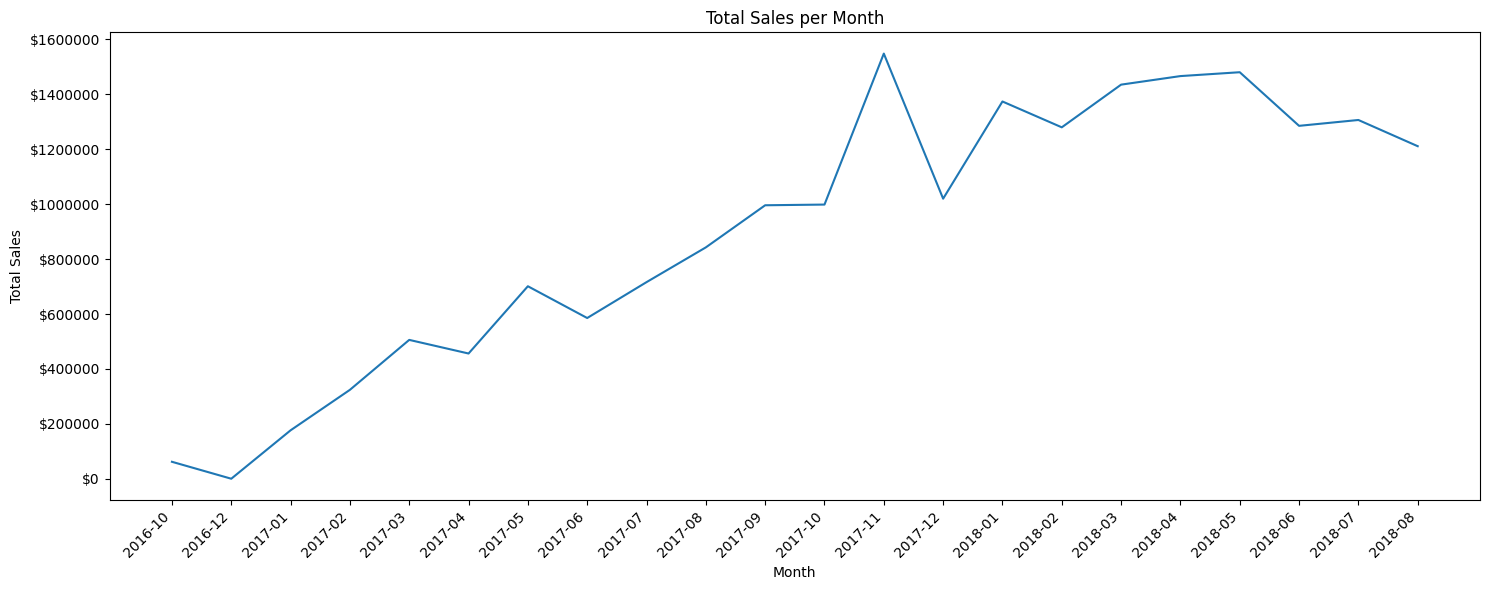

In [100]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create the line chart
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)

# Customize the chart
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales per Month")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Format the y-axis ticks as dollar amounts
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)

# Display the chart
plt.tight_layout()
plt.show()

### Total Orders per Month

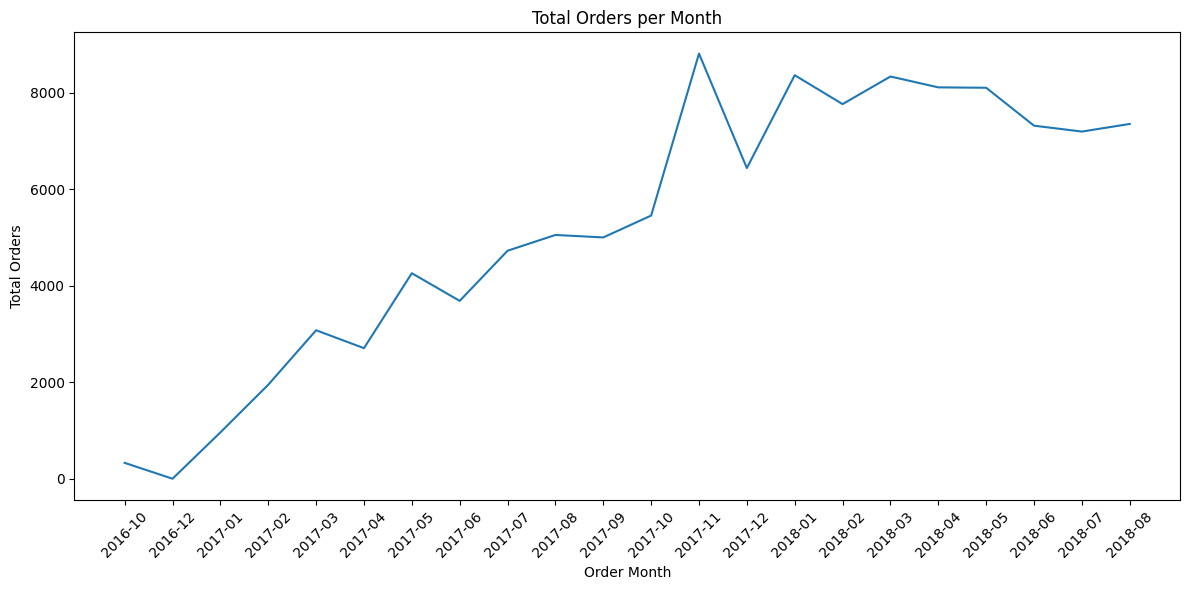

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values)
plt.xlabel("Order Month")
plt.ylabel("Total Orders")
plt.title("Total Orders per Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total Customers per Month

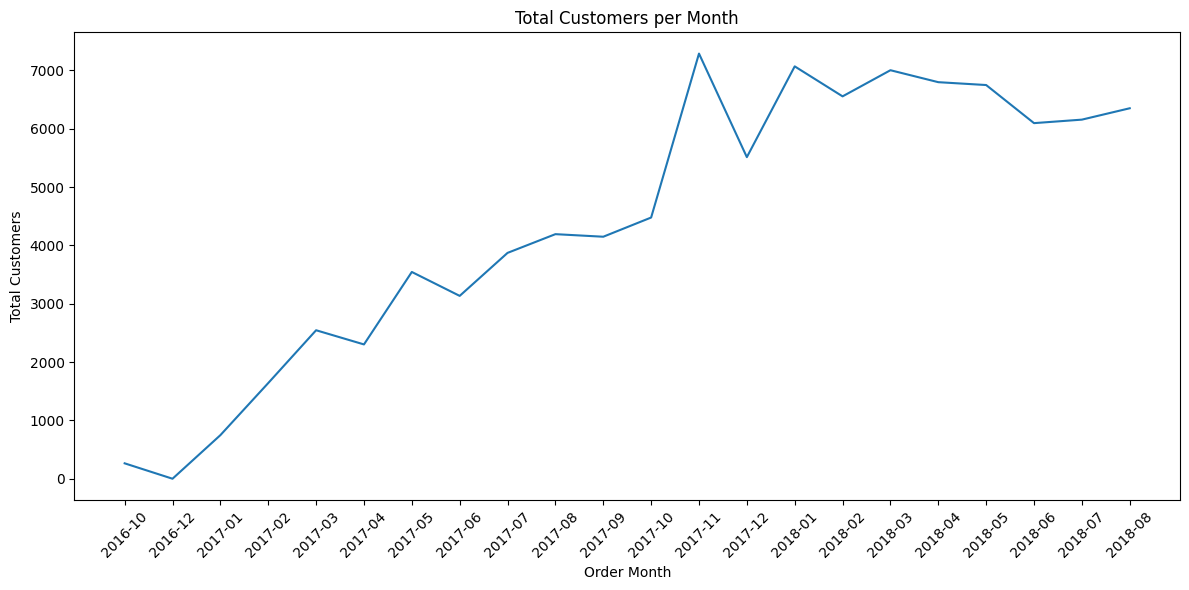

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_customers.index.astype(str), monthly_customers.values)
plt.xlabel("Order Month")
plt.ylabel("Total Customers")
plt.title("Total Customers per Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Sales per Customer per Month

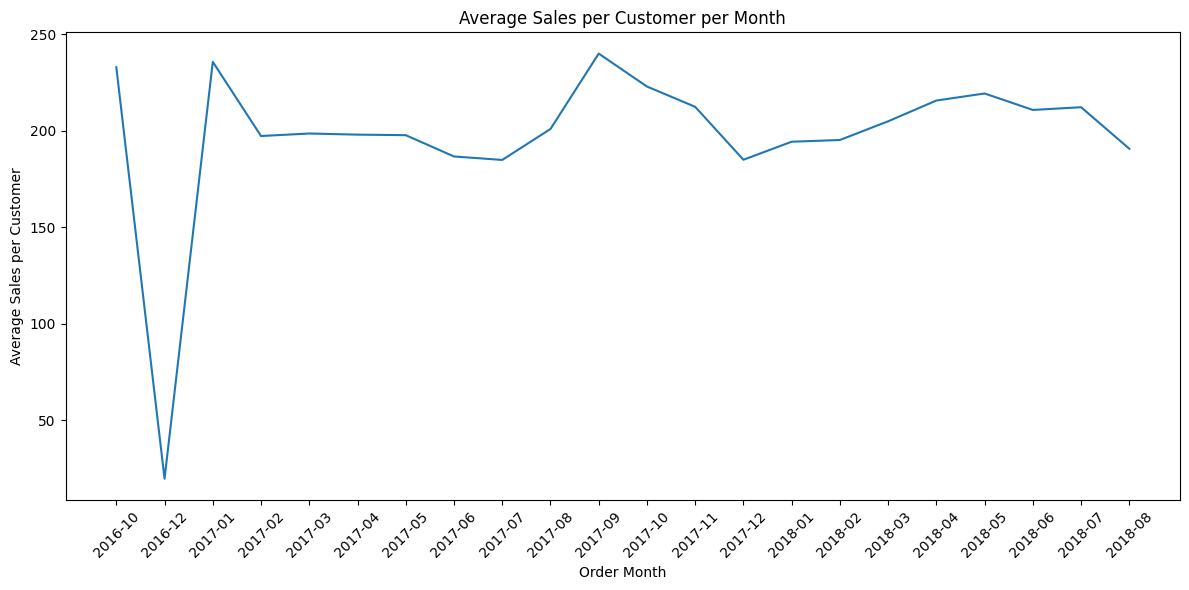

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index.astype(str), pivot_table['avg_sales_per_customer'].values)
plt.xlabel("Order Month")
plt.ylabel("Average Sales per Customer")
plt.title("Average Sales per Customer per Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bagaimana harga rata-rata produk per kategori, dan kategori mana yang paling diminati oleh pelanggan?

<ipython-input-104-50eb316dc008>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name_english', data=avg_popularity_product.sort_values(by='price', ascending=False).head(10), palette='viridis')


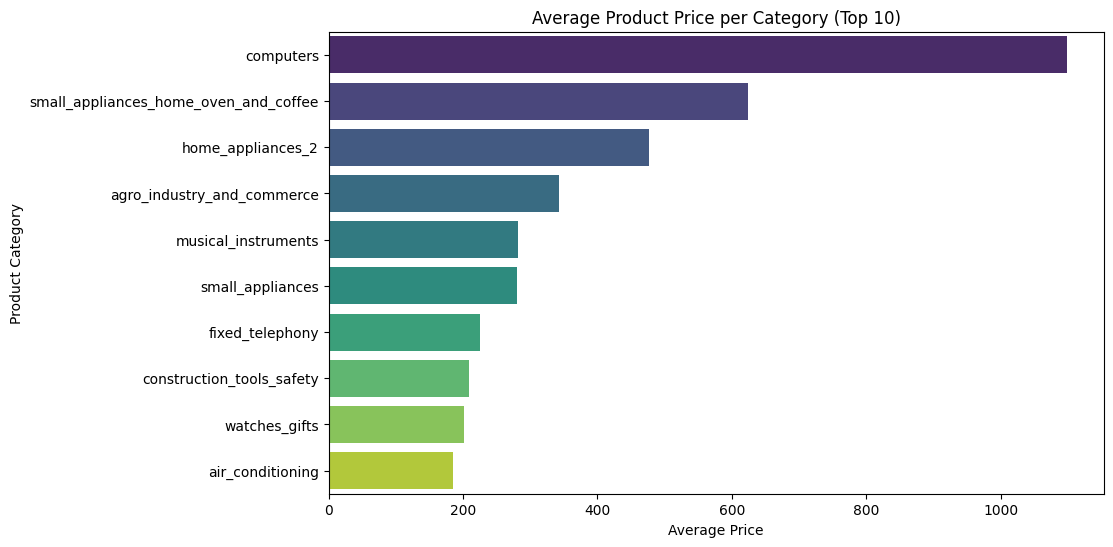

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='product_category_name_english', data=avg_popularity_product.sort_values(by='price', ascending=False).head(10), palette='viridis')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.title('Average Product Price per Category (Top 10)')
plt.show()

<ipython-input-105-f965172d0acc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='product_category_name_english', data=avg_popularity_product.sort_values(by='product_id', ascending=False).head(10), palette='viridis')


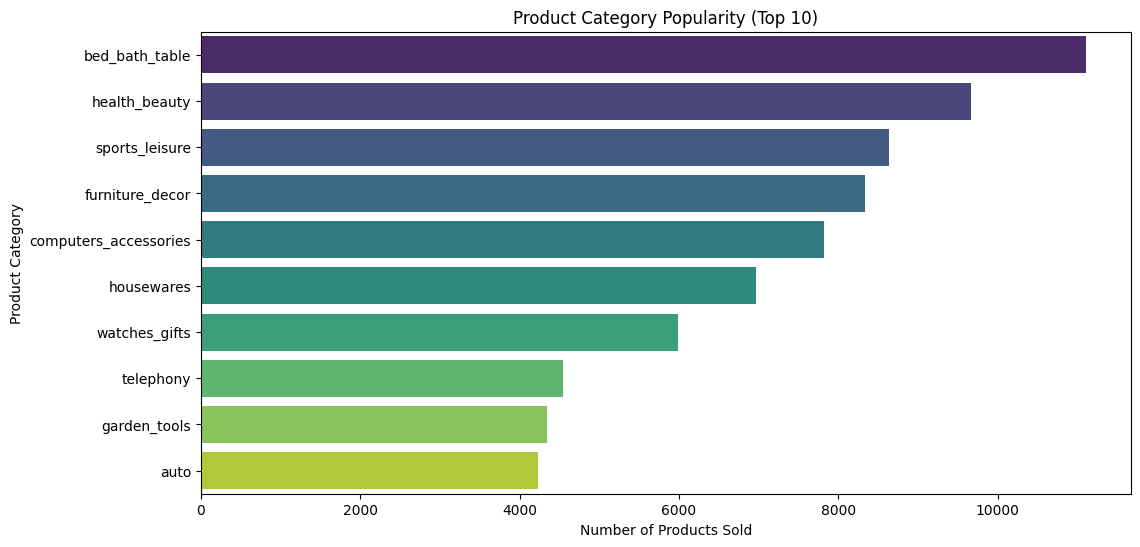

In [105]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='product_category_name_english', data=avg_popularity_product.sort_values(by='product_id', ascending=False).head(10), palette='viridis')
plt.xlabel('Number of Products Sold')
plt.ylabel('Product Category')
plt.title('Product Category Popularity (Top 10)')
plt.show()

### Apakah terdapat korelasi antara order delivery time and customer satisfaction?

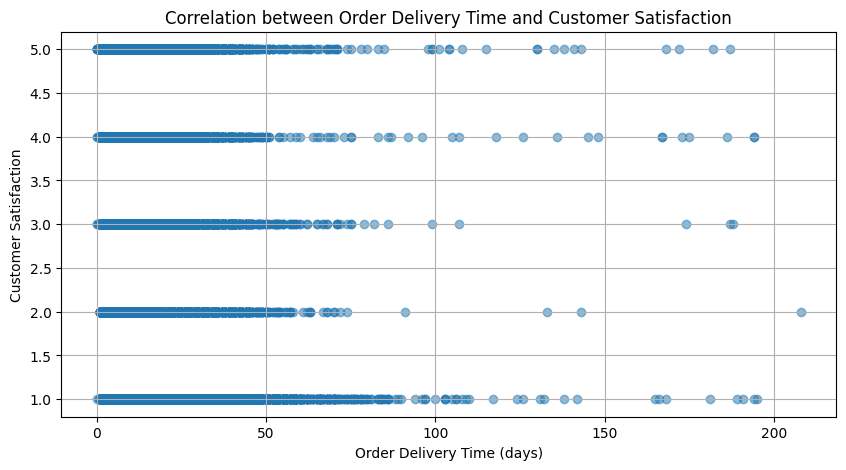

In [106]:
plt.figure(figsize=(10, 5))
plt.scatter(order_delivery_satisfaction_df['delivery_time'], order_delivery_satisfaction_df['review_score'], alpha=0.5)
plt.title('Correlation between Order Delivery Time and Customer Satisfaction')
plt.ylabel('Customer Satisfaction')
plt.xlabel('Order Delivery Time (days)')
plt.grid(True)
plt.show()

### RFM Analysis

<ipython-input-107-45789b4d1563>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-107-45789b4d1563>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-107-45789b4d1563>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


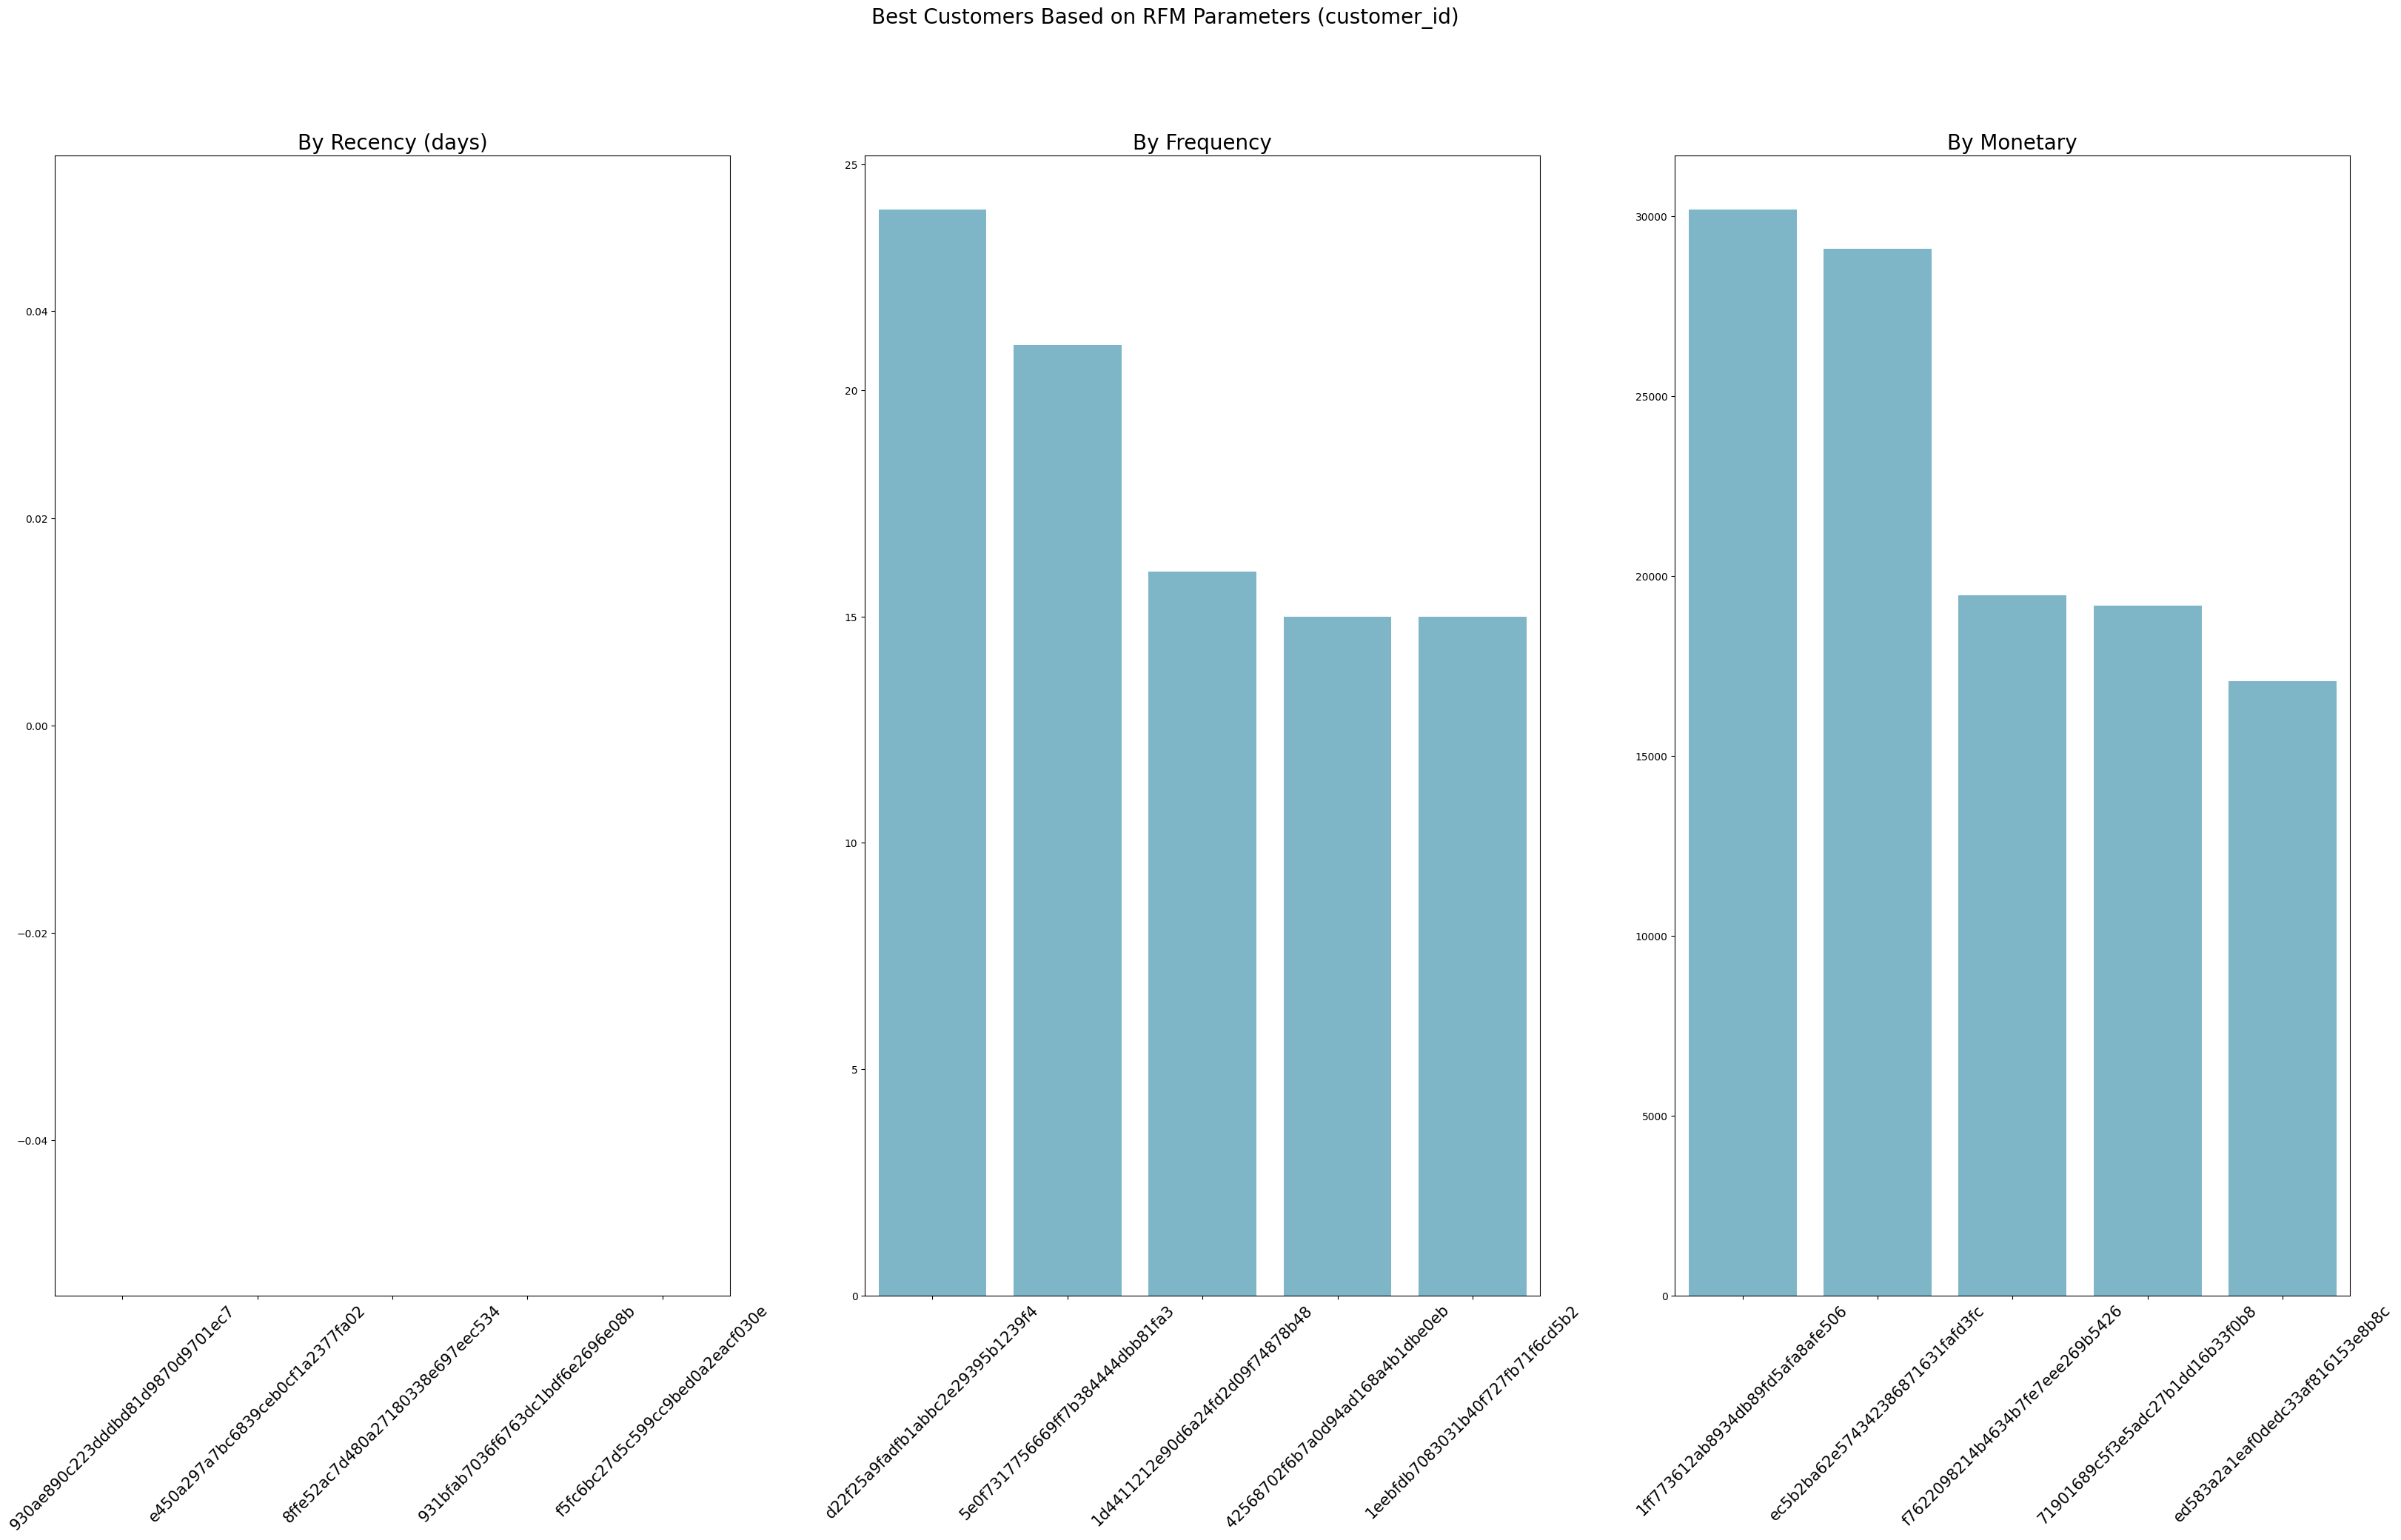

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for the bar plots
colors = ["#72BCD4"] * 5

# Create subplots for RFM metrics
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 20))

# Plotting Recency
sns.barplot(
    y="recency",
    x="customer_id",
    data=rfm_sorted.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_title("By Recency (days)", fontsize=20)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].tick_params(axis='x', rotation=45, labelsize=15)

# Plotting Frequency
sns.barplot(
    y="frequency",
    x="customer_id",
    data=rfm_sorted.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_title("By Frequency", fontsize=20)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].tick_params(axis='x', rotation=45, labelsize=15)

# Plotting Monetary
sns.barplot(
    y="monetary",
    x="customer_id",
    data=rfm_sorted.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    ax=ax[2]
)
ax[2].set_title("By Monetary", fontsize=20)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_ylabel("")
ax[2].set_xlabel("")
ax[2].tick_params(axis='x', rotation=45, labelsize=15)

# Set the overall title for the plots
plt.suptitle("Best Customers Based on RFM Parameters (customer_id)", fontsize=20)

# Display the plot
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Conclusion
_________

### Total Sales, Orders, and Customers

1. Monthly Sales

Chart ini menunjukkan data penjualan dari Oktober 2016 hingga Agustus 2018, yang mencerminkan tren kenaikan signifikan secara keseluruhan. Titik terendah terjadi pada Desember 2016 dengan nilai 19.62, sementara puncaknya tercapai pada November 2017 dengan nilai 1,548,547.86. Setelah kenaikan tajam dari awal 2017 hingga akhir 2017, tren mengalami sedikit fluktuasi namun tetap berada pada kisaran tinggi hingga pertengahan 2018. Secara keseluruhan, data ini memperlihatkan pola pertumbuhan positif dengan kenaikan drastis pada tahun 2017 dan stabilisasi pada tingkat yang lebih tinggi selama 2018.
2. Monthly Order

Chart ini memperlihatkan jumlah pesanan bulanan dari Oktober 2016 hingga Agustus 2018, menunjukkan pertumbuhan signifikan secara keseluruhan. Titik terendah terjadi pada Desember 2016 dengan 1 pesanan, sementara puncaknya tercapai pada November 2017 dengan 8.812 pesanan. Dari awal 2017, jumlah pesanan meningkat secara konsisten hingga mencapai puncak di akhir tahun, kemudian stabil di kisaran tinggi sepanjang 2018 meskipun sedikit menurun dari puncaknya. Secara keseluruhan, tren pesanan menunjukkan peningkatan yang kuat pada tahun 2017, diikuti oleh stabilisasi pada tingkat yang relatif tinggi di tahun 2018.
3. Monthly Customer


Chart ini memperlihatkan jumlah pelanggan bulanan dari Oktober 2016 hingga Agustus 2018, menunjukkan tren pertumbuhan yang signifikan secara keseluruhan. Jumlah pelanggan terendah tercatat pada Desember 2016 dengan 1 pelanggan, sementara puncaknya terjadi pada November 2017 dengan 7.288 pelanggan. Dari awal 2017, jumlah pelanggan meningkat tajam hingga akhir tahun 2017, diikuti oleh stabilisasi pada tingkat tinggi sepanjang tahun 2018 dengan sedikit penurunan setelah puncaknya. Secara keseluruhan, data ini menunjukkan pertumbuhan pesat selama 2017, yang kemudian berlanjut dengan konsistensi pada tingkat yang tinggi sepanjang 2018.

Sebagai kesimpulan, meskipun tren kenaikan secara keseluruhan mencerminkan keberadaan pasar yang kuat dan potensi pertumbuhan, pola penurunan pada tahun 2018 menandakan perlunya tindakan segera untuk mengatasi stagnasi penjualan. Bisnis harus memanfaatkan wawasan dari periode puncak untuk mengidentifikasi apa yang disukai pelanggan sambil mengatasi kesenjangan dalam kinerja. Dengan demikian, mereka dapat membangun ketahanan jangka panjang, memanfaatkan peluang pertumbuhan, dan mempertahankan lintasan penjualan yang stabil.

### Average Sales Per Customer Per Month

Chart ini menunjukkan rata-rata penjualan per pelanggan per bulan dari Oktober 2016 hingga Agustus 2018. Rata-rata penjualan tertinggi tercatat pada Oktober 2016 sebesar 233.01, sementara titik terendahnya terjadi pada Desember 2016 dengan 19.62. Setelah fluktuasi awal, rata-rata penjualan per pelanggan stabil pada kisaran 180-240 di tahun-tahun berikutnya, dengan sedikit peningkatan di beberapa bulan seperti September 2017 (240.08) dan Mei 2018 (219.39). Secara keseluruhan, tren menunjukkan penurunan tajam setelah Oktober 2016, diikuti dengan stabilisasi pada tingkat menengah hingga akhir periode.

Saran:

1. Fokus pada strategi retensi pelanggan karena stabilitas rata-rata penjualan per pelanggan menunjukkan potensi peningkatan penjualan dari basis pelanggan yang ada.
2. Analisis lebih lanjut diperlukan untuk memahami faktor-faktor yang menyebabkan fluktuasi awal dan mendorong kinerja bulan-bulan dengan penjualan lebih tinggi, seperti September 2017 dan Mei 2018.
3. Pertimbangkan penawaran promosi atau personalisasi produk untuk meningkatkan nilai rata-rata penjualan per pelanggan secara konsisten.

### Bagaimana harga rata-rata produk per kategori, dan kategori mana yang paling diminati oleh pelanggan?

- Harga rata-rata produk per kategori

Chart ini menggambarkan harga produk rata-rata di berbagai kategori menunjukkan variasi yang signifikan. "Komputer" muncul sebagai kategori dengan harga produk rata-rata tertinggi, melebihi 1100. Diikuti oleh "Peralatan Kecil, Oven Rumah Tangga, dan Kopi", "Peralatan Rumah Tangga 2", "Industri Pertanian dan Perdagangan", dan "Pendingin Udara" dengan harga rata-rata berkisar antara 700 dan 1000. Di sisi lain, kategori seperti "Bunga", "Keamanan dan Pengawasan", "Perlengkapan Pesta", "Tas Fashion", "Makanan Minuman", dan "Popok dan Kebersihan" memiliki harga produk rata-rata yang relatif lebih rendah, yaitu di bawah 200. Kisaran harga rata-rata yang luas ini menyoroti keberagaman dalam penawaran produk dan strategi penetapan harga di berbagai kategori dalam platform e-commerce.

- Kategori produk terpopuler

Chart ini menyajikan wawasan mengenai popularitas kategori produk berdasarkan jumlah produk yang terjual. "Bed Bath Table" memimpin popularitas dengan hampir 12.000 produk terjual, diikuti oleh "Health Beauty" dengan sekitar 10.000 produk dan "Sports Leisure" yang melampaui 9.000. "Furniture Decor", "Computers Accessories", "Housewares", dan "Watches and Accessories" juga termasuk kategori populer, masing-masing dengan lebih dari 6.000 produk terjual. Di sisi lain, kategori seperti "Arts and Craftmanship", "La Cuisine", "cds dvds musics", dan "Fashion Childrens Clothes" tampaknya kurang populer dengan angka penjualan yang jauh lebih rendah. Temuan ini menunjukkan preferensi pelanggan dan pola permintaan di berbagai kategori produk, yang memberikan informasi berharga untuk manajemen inventaris dan strategi pemasaran.

### Korelasi Antara Order Delivery Time dan Customer Satisfaction

Korelasi antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan sebesar -0.3336852815284544 menunjukkan adanya korelasi negatif yang lemah antara kedua variabel tersebut. Nilai korelasi negatif menunjukkan bahwa ada kecenderungan bahwa semakin lama waktu pengiriman pesanan, tingkat kepuasan pelanggan cenderung menurun. Namun, penting untuk diingat bahwa korelasi sebesar -0.3336852815284544 itu cukup lemah, yang berarti hubungan antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan tidak terlalu kuat.

Dalam konteks ini, sementara ada korelasi negatif yang lemah antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan, tidak dapat disimpulkan bahwa waktu pengiriman secara langsung menyebabkan penurunan tingkat kepuasan pelanggan. Hal ini hanya menunjukkan bahwa ada hubungan yang lemah antara kedua variabel tersebut.

### Analisis RFM (Recency, Frequency, Monetary)

#### **1. Recency**
Recency mengukur seberapa baru pelanggan terakhir kali melakukan transaksi. Dalam grafik "By Recency", data kosong menunjukkan bahwa pelanggan yang tercantum telah melakukan **transaksi pada hari yang sama** dengan waktu analisis ini. Dengan kata lain, mereka adalah pelanggan yang **paling aktif** dan baru saja berinteraksi dengan bisnis Anda.

Nilai recency yang sangat kecil (atau nol) menunjukkan bahwa pelanggan tersebut sangat terlibat dan memiliki hubungan aktif dengan bisnis. Pelanggan ini merupakan target yang ideal untuk mempertahankan loyalitas mereka melalui strategi pemasaran personalisasi.

**Kesimpulan untuk Recency:**
- Pelanggan ini sedang aktif bertransaksi.
- Mereka dapat dimasukkan ke dalam kategori pelanggan dengan tingkat urgensi tinggi untuk diberi perhatian, seperti memberikan penawaran khusus setelah transaksi mereka.

**Rekomendasi:**
- Kirimkan **ucapan terima kasih** atau penawaran langsung untuk pembelian berikutnya guna memperkuat loyalitas.
- Gunakan strategi **cross-selling** atau **up-selling** dengan produk yang relevan.

---

#### **2. Frequency**
Frequency mengukur seberapa sering pelanggan melakukan transaksi. Pada grafik "By Frequency," terlihat bahwa beberapa pelanggan memiliki frekuensi transaksi yang sangat tinggi, dengan puncaknya lebih dari 25 transaksi, sedangkan pelanggan lain memiliki frekuensi yang lebih rendah (antara 10 hingga 15 transaksi).

Pelanggan dengan frekuensi tinggi adalah pelanggan setia yang terus memberikan kontribusi besar terhadap aktivitas bisnis. Mereka adalah pelanggan **yang paling loyal** dan cenderung stabil dalam memberikan pendapatan.

**Kesimpulan untuk Frequency:**
- Pelanggan dengan frekuensi tinggi perlu dipertahankan melalui program loyalitas, seperti diskon eksklusif atau akses ke produk premium.
- Pelanggan dengan frekuensi rendah dapat diidentifikasi sebagai peluang untuk ditingkatkan, misalnya dengan memberikan insentif agar mereka lebih sering bertransaksi.

**Rekomendasi:**
- Gunakan **reward points** untuk pelanggan dengan frekuensi tinggi untuk memperkuat loyalitas.
- Lakukan kampanye pemasaran bertarget kepada pelanggan dengan frekuensi rendah untuk meningkatkan engagement mereka.

---

#### **3. Monetary**
Monetary menunjukkan seberapa besar pendapatan yang dihasilkan dari masing-masing pelanggan. Pada grafik "By Monetary," terlihat bahwa beberapa pelanggan menyumbang pendapatan yang sangat tinggi (mencapai lebih dari 30.000 unit mata uang), sementara pelanggan lainnya memberikan kontribusi yang lebih kecil.

Pelanggan dengan monetary tinggi merupakan aset yang sangat berharga bagi bisnis. Mereka termasuk dalam kategori **"big spender"** yang berkontribusi signifikan terhadap total pendapatan perusahaan. Sebaliknya, pelanggan dengan monetary rendah tetap penting, tetapi mungkin memerlukan pendekatan berbeda untuk meningkatkan kontribusi mereka.

**Kesimpulan untuk Monetary:**
- Pelanggan dengan monetary tinggi adalah prioritas utama untuk diberikan **pengalaman personalisasi** atau layanan premium.
- Pelanggan dengan monetary rendah perlu didorong untuk melakukan pembelian yang lebih besar melalui promosi, bundling produk, atau insentif pembelian.

**Rekomendasi:**
- Berikan pelanggan dengan monetary tinggi **penawaran eksklusif** seperti early access ke produk baru, bonus belanja, atau layanan prioritas.
- Tawarkan pelanggan dengan monetary rendah **promosi bundling** atau diskon khusus untuk mendorong peningkatan nilai transaksi mereka.